In [1]:
# Swarab Read comments im not using markdown
# Ignore this block its just an initial test

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def save_frames_as_images(frames, folder_name="images"):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # Save each frame with the format "image_00", "image_01", etc.
    for idx, frame in enumerate(frames):
        image_name = f"image_{idx:02d}.jpg"  # Naming format: image_00.jpg, image_01.jpg, etc.
        image_path = os.path.join(folder_name, image_name)
        cv2.imwrite(image_path, frame)  # Save the frame as a JPEG image
        print(f"Saved {image_name} to {folder_name}")

def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    motion_densities = []
    frames = []
    frame_times = []
    
    fps = cap.get(cv2.CAP_PROP_FPS)  # Get frames per second
    ret, prev_frame = cap.read()
    if not ret:
        print("Cannot read the video file.")
        return

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    frame_count = 1

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Compute the absolute difference between the current frame and the previous frame
        diff_frame = cv2.absdiff(gray, prev_gray)
        
        # Threshold the difference image to binarize
        _, thresh = cv2.threshold(diff_frame, 25, 255, cv2.THRESH_BINARY)
        
        # Calculate motion density as the number of non-zero pixels
        motion_density = np.sum(thresh) / 255
        
        # Store motion density and frame
        motion_densities.append(motion_density)
        frames.append(frame)
        frame_times.append(frame_count / fps)  # Store time in seconds
        
        # Prepare for next iteration
        prev_gray = gray.copy()
        frame_count += 1

    cap.release()

    # Convert motion densities to a NumPy array
    motion_densities = np.array(motion_densities)

    # Get the indices of the top 5 frames with the most motion
    top_indices = motion_densities.argsort()[-5:][::-1]
    
    # Plot the top 5 frames in a single row using matplotlib
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for idx, frame_idx in enumerate(top_indices):
        axes[idx].imshow(cv2.cvtColor(frames[frame_idx], cv2.COLOR_BGR2RGB))
        axes[idx].set_title(f'Top {idx+1}')
        axes[idx].axis('off')  # Turn off axis

    plt.suptitle('Top 5 Frames with Highest Motion')
    plt.tight_layout()
    plt.show()
    
    # Plot motion density over time (seconds)
    plt.figure(figsize=(12, 6))
    plt.plot(frame_times, motion_densities, label='Motion Density')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Motion Density')
    plt.title('Motion Density over Time')
    plt.legend()
    plt.show()

    # Save all frames as images
    save_frames_as_images(frames, folder_name="images")





In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


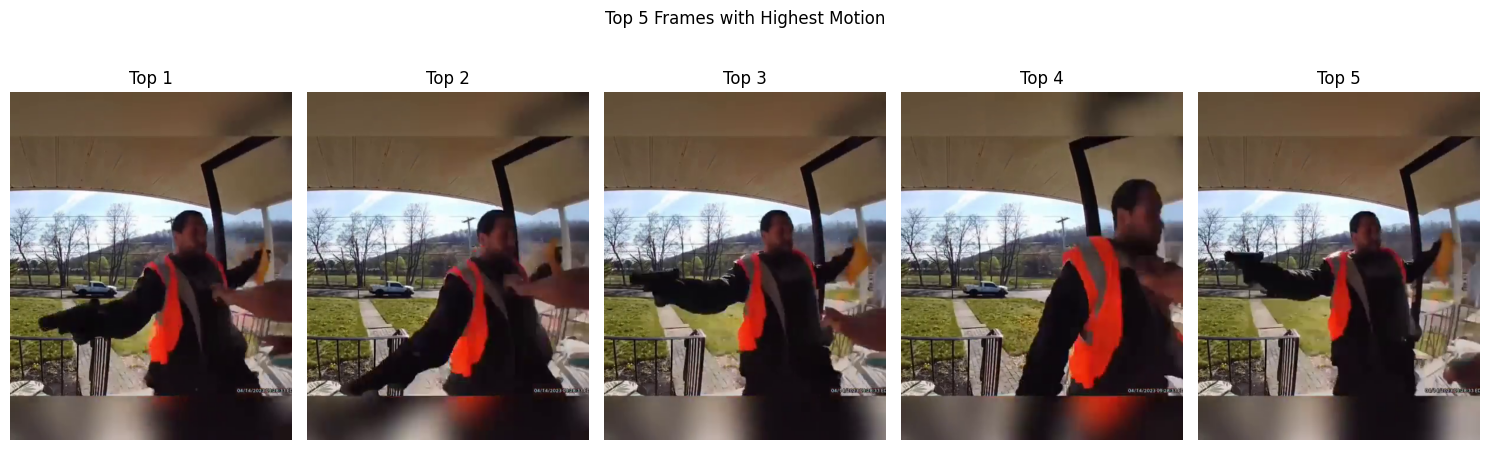

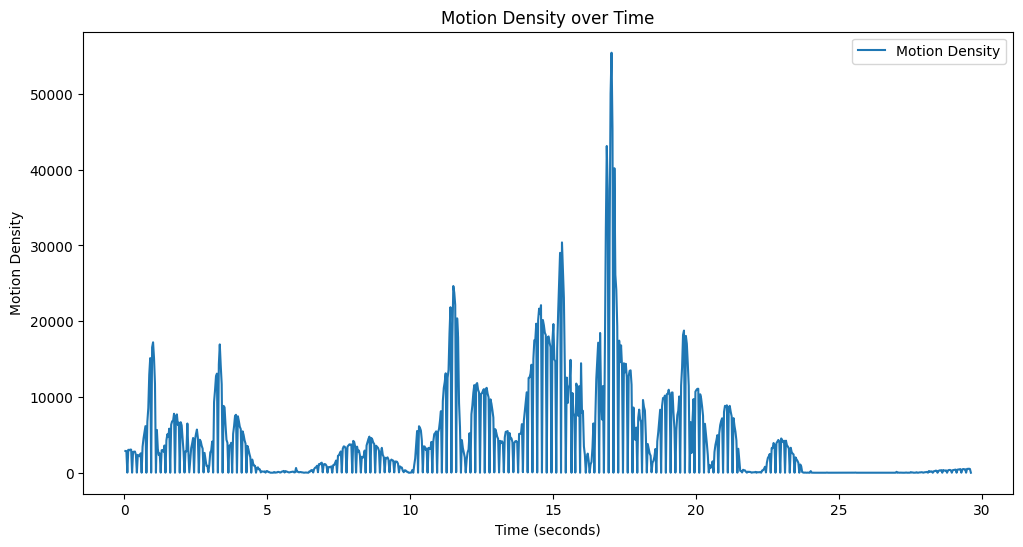

Saved image_00.jpg to images
Saved image_01.jpg to images
Saved image_02.jpg to images
Saved image_03.jpg to images
Saved image_04.jpg to images
Saved image_05.jpg to images
Saved image_06.jpg to images
Saved image_07.jpg to images
Saved image_08.jpg to images
Saved image_09.jpg to images
Saved image_10.jpg to images
Saved image_11.jpg to images
Saved image_12.jpg to images
Saved image_13.jpg to images
Saved image_14.jpg to images
Saved image_15.jpg to images
Saved image_16.jpg to images
Saved image_17.jpg to images
Saved image_18.jpg to images
Saved image_19.jpg to images
Saved image_20.jpg to images
Saved image_21.jpg to images
Saved image_22.jpg to images
Saved image_23.jpg to images
Saved image_24.jpg to images
Saved image_25.jpg to images
Saved image_26.jpg to images
Saved image_27.jpg to images
Saved image_28.jpg to images
Saved image_29.jpg to images
Saved image_30.jpg to images
Saved image_31.jpg to images
Saved image_32.jpg to images
Saved image_33.jpg to images
Saved image_34

In [2]:
# Example usage
video_file = 'examplevideo.mp4'  # Replace with your video file path
process_video(video_file)

In [6]:
# This loads the transformer from a 3rd party git called timm

import torch
import timm
import torchvision.transforms as transforms

# Load the pre-trained MobileViT model from timm
model = timm.create_model('mobilevit_s', pretrained=True)

# Set the model to evaluation mode
model.eval()

# Define image preprocessing steps (resize and normalize as per model requirements)
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [8]:
from PIL import Image

# Load your doorcam image
image = Image.open('images/image_01.jpg')

# # Preprocess the image
# input_tensor = preprocess(image)
# input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# # Ensure the image is on the correct device (CPU or GPU)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# input_batch = input_batch.to(device)
# model.to(device)


In [5]:
with torch.no_grad():
    image_features = model(input_batch)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
# another test, actual caption generation. using blip from transformers

import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

# Check if CUDA (GPU) is available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BLIP processor and model for image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Move the model to the same device (GPU or CPU)
blip_model.to(device)

# Convert the image to the format required by BLIP and move to the same device
inputs = processor(images=image, return_tensors="pt").to(device)

# Generate caption
with torch.no_grad():
    generated_ids = blip_model.generate(**inputs)
    caption = processor.decode(generated_ids[0], skip_special_tokens=True)

print("Generated Caption:", caption)


/home/siddarth/general/mv/myenv/lib/python3.12/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a man in a vest is standing on a balcony


In [5]:
def generate_captions(image_folder, output_file, processor, blip_model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    if not processor:
        processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
        blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    blip_model.to(device)

    with open("output_file", 'w') as file:

        for image_name in os.listdir(image_folder):
            if image_name.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(image_folder, image_name)

                image = Image.open(image_path).convert('RGB')
                inputs = processor(images=image, return_tensors="pt").to(device)

                with torch.no_grad():
                    generated_ids = blip_model.generate(**inputs)
                    caption = processor.decode(generated_ids[0], skip_special_tokens=True)

                file.write(f"{image_name}: {caption}\n")
                print(f"Generated caption for {image_name}: {caption}")
    

In [15]:
image_folder = 'images'
output_file = 'captions.txt'
generate_captions(image_folder, output_file, processor, blip_model)

/home/siddarth/general/mv/myenv/lib/python3.12/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated caption for image_796.jpg: a view of a street from a car
Generated caption for image_643.jpg: a view of a street from a car
Generated caption for image_731.jpg: a view of a street from a car
Generated caption for image_429.jpg: a man in a life vest is seen on the street
Generated caption for image_119.jpg: a man in an orange vest is standing on a porch
Generated caption for image_214.jpg: a man in an orange vest is standing on a porch
Generated caption for image_02.jpg: a man in a vest is standing on a balcony
Generated caption for image_112.jpg: a man in a vest is standing on a porch
Generated caption for image_326.jpg: a man in a safety vest is seen through a hole
Generated caption for image_66.jpg: a man in an orange vest is standing on a porch
Generated caption for image_388.jpg: a man in a safety vest is standing on a boat
Generated caption for image_864.jpg: a view of a street from a car
Generated caption for image_404.jpg: a man in a vest is standing on a bus
Generated

In [3]:
# Final one with better frame selection using local maxima stuff

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os

def process_video_with_local_maxima(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    motion_densities = []
    frames = []
    frame_indices = []
    
    ret, prev_frame = cap.read()
    if not ret:
        print("Cannot read the video file.")
        return

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    frame_count = 1

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Compute the absolute difference between the current frame and the previous frame
        diff_frame = cv2.absdiff(gray, prev_gray)
        
        # Threshold the difference image to binarize
        _, thresh = cv2.threshold(diff_frame, 25, 255, cv2.THRESH_BINARY)
        
        # Calculate motion density as the number of non-zero pixels
        motion_density = np.sum(thresh) / 255
        
        # Store motion density and frame
        motion_densities.append(motion_density)
        frames.append(frame)
        frame_indices.append(frame_count)
        
        # Prepare for next iteration
        prev_gray = gray.copy()
        frame_count += 1

    cap.release()

    # Convert motion densities to a NumPy array
    motion_densities = np.array(motion_densities)

    # Detect local maxima in motion density
    peaks, _ = find_peaks(motion_densities, distance=5, prominence=15000)

    print(f"Found {len(peaks)} local maxima in motion density.")

    # For each peak, select 3 frames around that point
    frames_to_store = []
    for peak_idx in peaks:
        start_idx = max(peak_idx - 5, 0)
        end_idx = min(peak_idx + 5, len(frames))
        for idx in range(start_idx, end_idx):
            frames_to_store.append((frame_indices[idx], frames[idx]))
        print(f"Storing frames from index {start_idx} to {end_idx - 1} around peak at frame {peak_idx}")

    output_directory = "output_frames"
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Display and store the selected frames
    for idx, (frame_number, frame) in enumerate(frames_to_store):
        print(f"stored frame at frame index: {frame_number}")
        output_path = os.path.join(output_directory, f"stored_frame_{frame_number}.jpg")
        cv2.imwrite(output_path, frame)

    # Plot motion density over time with peaks marked
    plt.figure(figsize=(12, 6))
    plt.plot(frame_indices, motion_densities, label='Motion Density')
    plt.plot([frame_indices[p] for p in peaks], motion_densities[peaks], "x", label='Local Maxima')
    plt.xlabel('Frame Index')
    plt.ylabel('Motion Density')
    plt.title('Motion Density over Time with Local Maxima')
    plt.legend()
    plt.show()




Found 13 local maxima in motion density.
Storing frames from index 24 to 33 around peak at frame 29
Storing frames from index 94 to 103 around peak at frame 99
Storing frames from index 339 to 348 around peak at frame 344
Storing frames from index 426 to 435 around peak at frame 431
Storing frames from index 431 to 440 around peak at frame 436
Storing frames from index 439 to 448 around peak at frame 444
Storing frames from index 444 to 453 around peak at frame 449
Storing frames from index 453 to 462 around peak at frame 458
Storing frames from index 493 to 502 around peak at frame 498
Storing frames from index 500 to 509 around peak at frame 505
Storing frames from index 505 to 514 around peak at frame 510
Storing frames from index 513 to 522 around peak at frame 518
Storing frames from index 581 to 590 around peak at frame 586
stored frame at frame index: 25
stored frame at frame index: 26
stored frame at frame index: 27
stored frame at frame index: 28
stored frame at frame index: 2

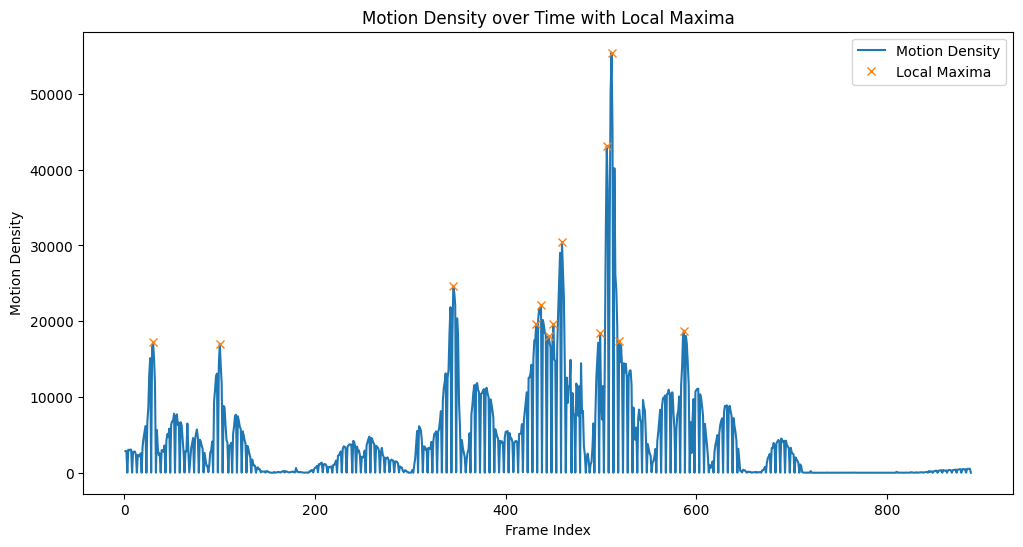

In [4]:
video_file = 'examplevideo.mp4'
process_video_with_local_maxima(video_file)


In [11]:
# Caching model to speed up load times

processor.save_pretrained("models")
blip_model.save_pretrained("models")


In [12]:
processor = BlipProcessor.from_pretrained("models")
blip_model = BlipForConditionalGeneration.from_pretrained("models")


In [13]:
generate_captions(image_folder="output_frames", output_file="captions.txt", processor=processor, blip_model=blip_model)

/home/siddarth/general/mv/myenv/lib/python3.12/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated caption for stored_frame_342.jpg: a man in a vest is standing outside
Generated caption for stored_frame_427.jpg: a man in a vest is standing on a platform
Generated caption for stored_frame_521.jpg: a man in a red vest is standing on a balcony
Generated caption for stored_frame_495.jpg: a man is seen in the back of a car
Generated caption for stored_frame_586.jpg: a man in an orange vest is standing on a bridge
Generated caption for stored_frame_505.jpg: a man in an orange vest is standing on a sidewalk
Generated caption for stored_frame_451.jpg: a man in a safety vest is seen from the inside of a car
Generated caption for stored_frame_585.jpg: a man in an orange vest is standing on a metal railing
Generated caption for stored_frame_429.jpg: a man in a vest is standing on a platform
Generated caption for stored_frame_504.jpg: a man in a safety vest is seen from inside a car
Generated caption for stored_frame_502.jpg: a man in a safety vest is seen from inside a car
Generated